# Hands On Python 3 - Datenaufbereitung
Dieses Notebook zeigt wie
- man Daten aus zwei csv Dateien zu einem Datensatz zusammenfügen kann
- wie man mit nicht existenten Werten (NaN - Not a Number) umgeht
- wie man Zeitreihen mit unterschiedlichen Frequenzen auf eine gemeinsame Frequenz bringen kann

## Notwendige Bibliotheken importieren

In [35]:
# notwendige Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

## Daten einlesen

In [36]:
# Daten einlesen

# Daten der 1. Quelle
#rawData1 = pd.read_csv('/content/drive/My Drive/source1.csv')
rawData1 = pd.read_csv("../data/source1.csv")

# Lesen Sie die Daten der 2. Quelle ein
#rawData2 = pd.read_csv('/content/drive/My Drive/source2.csv')
rawData2 = pd.read_csv("../data/source2.csv")

In [37]:
# Anzahl der Zeilen und Spalten ausgeben 

# Geben Sie Zeilen und Spalten des 1. Datensatzes von Quelle 1 aus
print(rawData1.shape)

# Geben Sie Zeilen und Spalten des 2. Datensatzes von Quelle 2 aus
rawData2.shape


(135, 5)


(45, 2)

In [38]:
# Geben Sie die ersten Zeilen von Quelle 1 aus:
rawData1.head()

,Date,Energy,Light,CO2,Occupancy
0,2015-02-02 14:15:00,26.285636,527.283333,785.951515,1.0
1,2015-02-02 14:30:00,27.016313,481.697917,894.539583,1.0
2,2015-02-02 14:45:00,27.612107,499.415646,992.291327,1.0
3,2015-02-02 15:00:00,28.006019,456.436190,1051.151905,1.0
4,2015-02-02 15:15:00,28.489948,464.760417,1101.779167,1.0


In [39]:
# Geben Sie die ersten Zeilen von Quelle 2 aus:
rawData2.head()

,Date,Temperature
0,2015-02-02 14:00:00,23.657118
1,2015-02-02 15:00:00,23.293950
2,2015-02-02 16:00:00,22.773142
3,2015-02-02 17:00:00,22.534520
4,2015-02-02 18:00:00,21.993372


In [40]:
# Geben Sie die letzten Zeilen von Quelle 1 aus:
rawData1.tail()

,Date,Energy,Light,CO2,Occupancy
130,2015-02-03 22:45:00,25.365469,0.0,570.291667,0.0
131,2015-02-03 23:00:00,25.242750,0.0,563.398810,0.0
132,2015-02-03 23:15:00,25.146556,0.0,559.753333,0.0
133,2015-02-03 23:30:00,25.029479,0.0,555.600000,0.0
134,2015-02-03 23:45:00,24.941250,0.0,553.130952,0.0


In [41]:
# Geben Sie die letzten Zeilen von Quelle 2 aus
rawData2.tail()

,Date,Temperature
40,2015-02-04 06:00:00,20.576972
41,2015-02-04 07:00:00,20.509123
42,2015-02-04 08:00:00,20.957842
43,2015-02-04 09:00:00,22.234915
44,2015-02-04 10:00:00,23.946885


## Daten auf fehlende Werte hin überprüfen

In [42]:
# Geben Sie sich die Anzahl der NaNs in den Spalten von Quelle 2 aus:
rawData2.isna().sum()

Date           0
Temperature    0
dtype: int64

In [43]:
# Sofern der Datensatz keine NaNs erhält --> Kopie der Rohdaten namens data2 erstellen und damit direkt weiterarbeiten:
data2 = rawData2.copy()

In [44]:
# Wie sieht es bei rawData1 aus? Geben Sie für rawData1 die Anzahl der NaNs in den Spalten aus
rawData1.isna().sum()

Date          0
Energy        0
Light        10
CO2           0
Occupancy     0
dtype: int64

## Mit NaNs umgehen

### Möglichkeit 1: alle Zeilen, in denen mindestens 1x NaN vorkommt, löschen

In [45]:
# Kopie der Rohdaten anlegen
data1_del = rawData1.copy() 

# Zeilen mit mind. 1x NaN löschen (d.h. in irgendeiner Spalte kommt ein NaN vor --> Zeile wird gelöscht)
data1_del.dropna(inplace=True)

# Überprüfen
data1_del.isna().sum()

Date         0
Energy       0
Light        0
CO2          0
Occupancy    0
dtype: int64

### Möglichkeit 2: Fehlende Werte durch interpolierte Werte ersetzen

### Linear Interpolieren

In [46]:
# Führen Sie eine lineare Interpolation durch. Erstellen Sie sich dazu zunächst data1_ip als Kopie von rawData1
data1_ip = rawData1.copy()

# Führen Sie die Interpolation durch
data1_ip.interpolate(inplace=True)

# Geben Sie sich die Anzahl an NaN in den Spalten nach der Interpolation aus:
data1_ip.isna().sum()

Date         0
Energy       0
Light        0
CO2          0
Occupancy    0
dtype: int64

<Axes: >

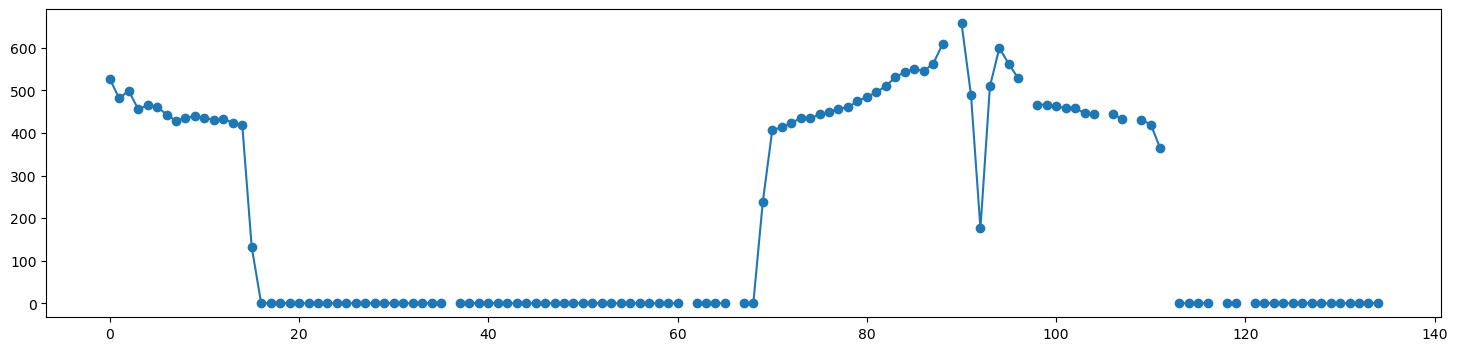

In [47]:
# Plotten der alten Zeitreihe
plt.figure(figsize=(18, 4))
rawData1['Light'].plot(marker='o')   

<Axes: >

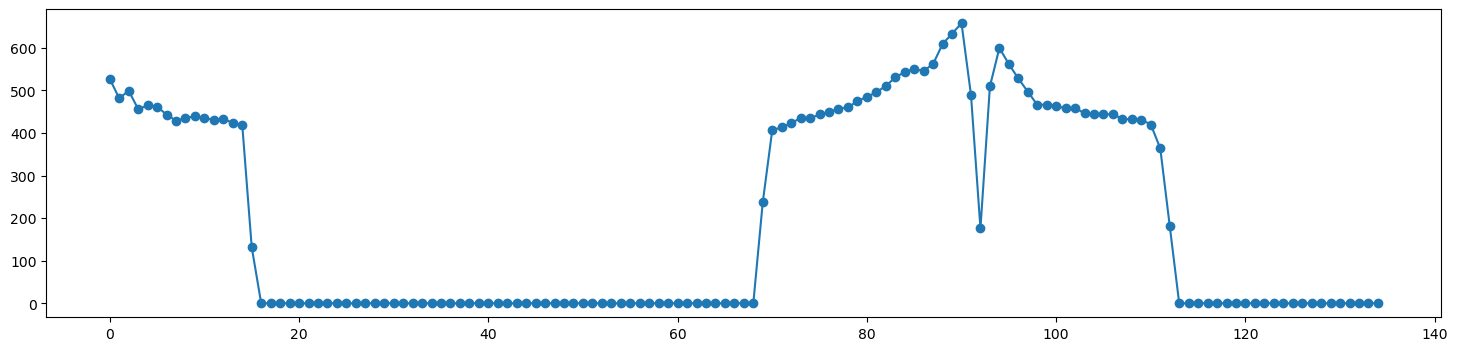

In [48]:
#neue Zeitreihe mit interpolierten Werten plotten
plt.figure(figsize=(18, 4))
data1_ip['Light'].plot(marker='o')

Wie zufrieden sind Sie mit der Interpolation?


....

In [49]:
# Grundsätzlich ist auch möglich mit Polynomfunktionen zu interpolieren.
# Interpolieren Sie quadratisch (method='polynomial', order=2)
data1_ip2 = rawData1.copy()
data1_ip2 = data1_ip2.interpolate(method='polynomial', order=2)

# Anzahl an NaN in Spalten ausgeben
data1_ip2.isna().sum()


Date         0
Energy       0
Light        0
CO2          0
Occupancy    0
dtype: int64

Text(0.5, 1.0, 'No Interpolation')

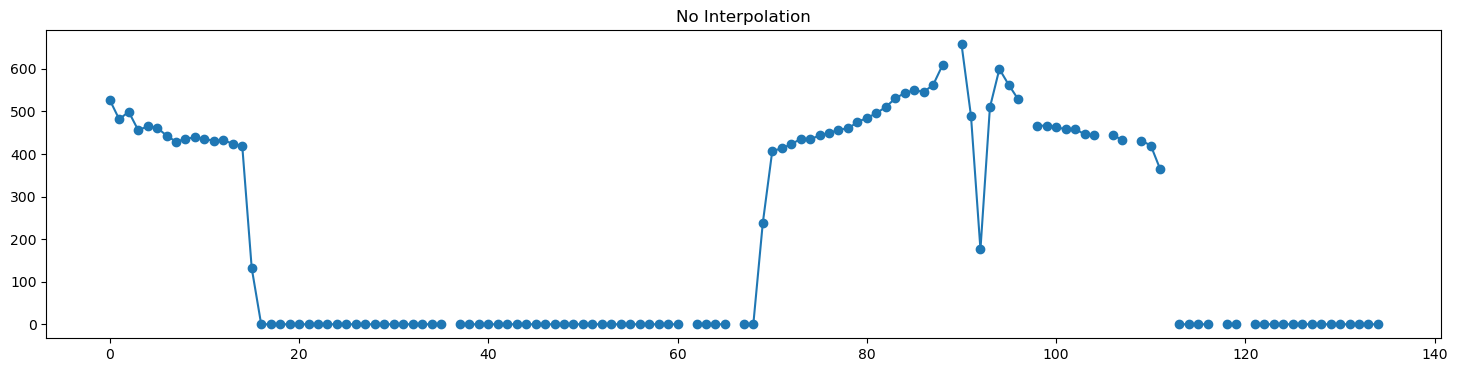

In [50]:
# Plotten Sie zum Vergleich wieder die alte und die neue Zeitreihe 
# Plot der alten Zeitreihe:
plt.figure(figsize=(18, 4))
rawData1['Light'].plot(marker='o')
plt.title("No Interpolation")


Text(0.5, 1.0, 'Linear Interpolation')

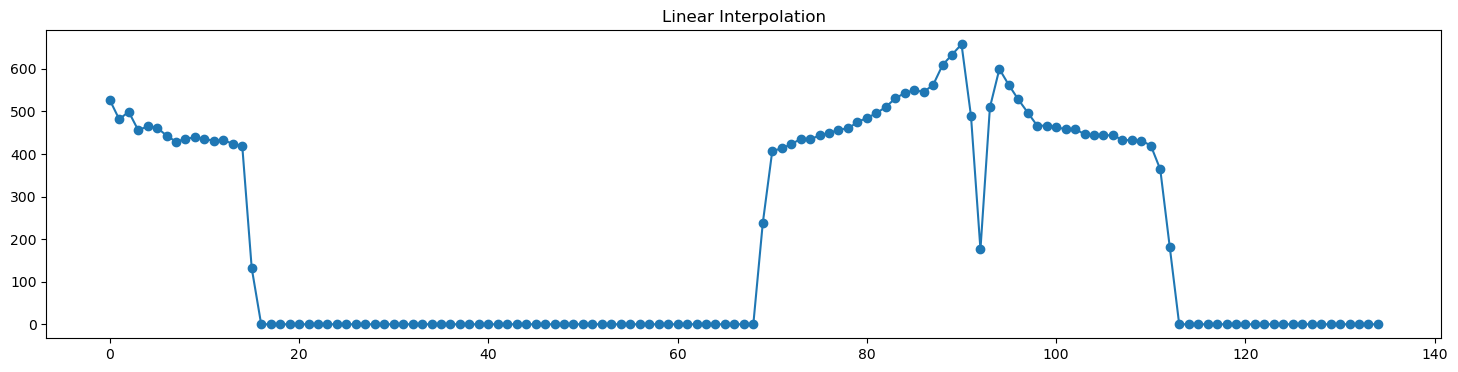

In [51]:
plt.figure(figsize=(18, 4))
data1_ip["Light"].plot(marker='o')
plt.title("Linear Interpolation")

Text(0.5, 1.0, 'Quadratic and linear Interpolation in Comparison')

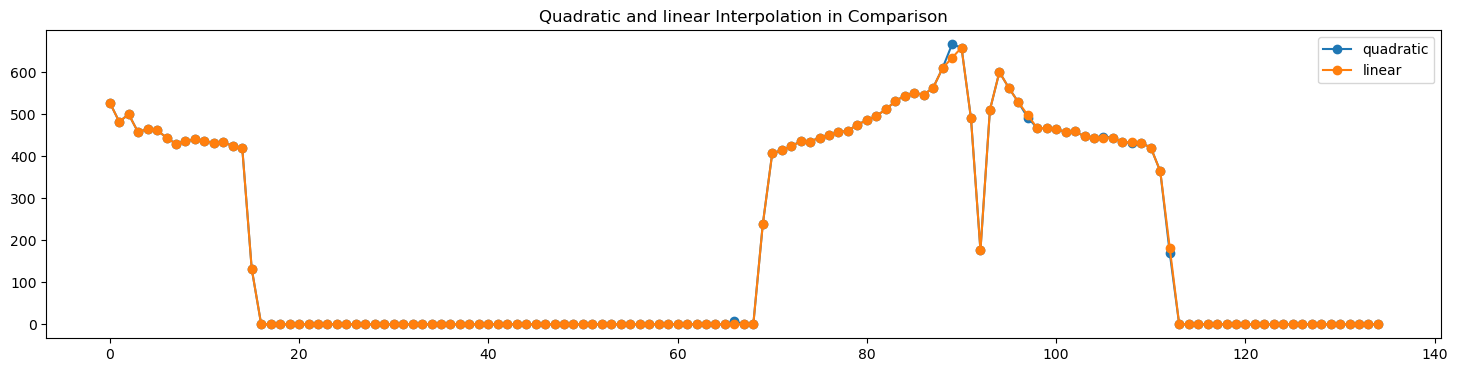

In [52]:
# Plot der neuen Zeitreihe:
plt.figure(figsize=(18, 4))
data1_ip2["Light"].plot(marker='o')
data1_ip["Light"].plot(marker='o')
plt.legend(["quadratic", "linear"])
plt.title("Quadratic and linear Interpolation in Comparison")

Hat sich die quadratische Interpolation im Vergleich zur linearen gelohnt? Welches der beiden Interpolationsverfahren würden Sie wählen?

No, the quadratic interpolation has more anomalies than the linear one. I would choose the linear interpolation.

## Zeitstempel als Index setzen
- Momentan sind die Zeilenindizes einfach durchnummeriert: 0,1,2,...
- Wenn der Zeitstempel als Index gesetzt wird, kann man einfacher arbeiten
- Dafür muss der Zeitstempel als erstes in das Format datetime gebracht werden, damit Python ihn als Zeitstempel erkennt

In [53]:
# die Spalte Date ist noch nicht im datetime Format
data1_ip.dtypes

Date          object
Energy       float64
Light        float64
CO2          float64
Occupancy    float64
dtype: object

In [54]:
# Bringen Sie die Spalte Date ins datetime Format 
data1_ip['Date'] = pd.to_datetime(data1_ip['Date'])

In [55]:
# Indizieren Sie mit der Zeitstempel-Spalte 
# data1_ip.set_index('Date', inplace=True) # <- already done, will throw error if run again

# Kontrollieren Sie das durch Ausgabe der ersten Zeilen des Datensatzes. 
data1_ip.iloc[:,0:0]

""
0
1
2
3
4
...
130
131
132
133


In [56]:
data1_ip.head()

,Date,Energy,Light,CO2,Occupancy
0,2015-02-02 14:15:00,26.285636,527.283333,785.951515,1.0
1,2015-02-02 14:30:00,27.016313,481.697917,894.539583,1.0
2,2015-02-02 14:45:00,27.612107,499.415646,992.291327,1.0
3,2015-02-02 15:00:00,28.006019,456.436190,1051.151905,1.0
4,2015-02-02 15:15:00,28.489948,464.760417,1101.779167,1.0


Wieso wird bei wiederholtem Ausführen obiger Zelle ein Fehler geworfen? Müssen Sie etwas am Code korrigieren?

The Date column is already the index, which means there is no "Date" column per se anymore. Therefore the code throws a "missing column" error - since there technically is no "date" column anymore as seen in the code above.

To circument the error, you can add a line above to reset the index before setting it.

In [57]:
# Indizieren Sie auch data2 mit dessen Zeitstempel
data2["Date"] = pd.to_datetime(data2["Date"])
data2.set_index('Date', inplace=True)
data2.head()

,Temperature
Date,
2015-02-02 14:00:00,23.657118
2015-02-02 15:00:00,23.293950
2015-02-02 16:00:00,22.773142
2015-02-02 17:00:00,22.534520
2015-02-02 18:00:00,21.993372


## Datensätze zu einem Zusammenfügen
- Problem: Die Datensätze haben unterschiedliche Frequenzen: Datensatz 1: 15min, Datensatz 2: stündlich
- Möglichkeit 1: Nur die Indizes nehmen, die sowohl in Datensatz 1, als auch in Datensatz 2 sind, also jede volle Stunde
- Möglichkeit 2: Den Datensatz mit der höheren Frequenz (Datensatz 1) runtersamplen, z.B. indem der stündliche Mittelwert oder die Summe über je eine Stunde gebildet wird

Frage: Worauf muss man aufpassen, wenn man Möglichkeit 2 wählt?

In [58]:
print(data1_ip.head())
print(data1_ip.tail())

print(data2.head())
print(data2.tail())

                 Date     Energy       Light          CO2  Occupancy
0 2015-02-02 14:15:00  26.285636  527.283333   785.951515        1.0
1 2015-02-02 14:30:00  27.016313  481.697917   894.539583        1.0
2 2015-02-02 14:45:00  27.612107  499.415646   992.291327        1.0
3 2015-02-02 15:00:00  28.006019  456.436190  1051.151905        1.0
4 2015-02-02 15:15:00  28.489948  464.760417  1101.779167        1.0
                   Date     Energy  Light         CO2  Occupancy
130 2015-02-03 22:45:00  25.365469    0.0  570.291667        0.0
131 2015-02-03 23:00:00  25.242750    0.0  563.398810        0.0
132 2015-02-03 23:15:00  25.146556    0.0  559.753333        0.0
133 2015-02-03 23:30:00  25.029479    0.0  555.600000        0.0
134 2015-02-03 23:45:00  24.941250    0.0  553.130952        0.0
                     Temperature
Date                            
2015-02-02 14:00:00    23.657118
2015-02-02 15:00:00    23.293950
2015-02-02 16:00:00    22.773142
2015-02-02 17:00:00    22.53452

In [59]:
data1_ip.index

RangeIndex(start=0, stop=135, step=1)

In [60]:
data2.index

DatetimeIndex(['2015-02-02 14:00:00', '2015-02-02 15:00:00',
               '2015-02-02 16:00:00', '2015-02-02 17:00:00',
               '2015-02-02 18:00:00', '2015-02-02 19:00:00',
               '2015-02-02 20:00:00', '2015-02-02 21:00:00',
               '2015-02-02 22:00:00', '2015-02-02 23:00:00',
               '2015-02-03 00:00:00', '2015-02-03 01:00:00',
               '2015-02-03 02:00:00', '2015-02-03 03:00:00',
               '2015-02-03 04:00:00', '2015-02-03 05:00:00',
               '2015-02-03 06:00:00', '2015-02-03 07:00:00',
               '2015-02-03 08:00:00', '2015-02-03 09:00:00',
               '2015-02-03 10:00:00', '2015-02-03 11:00:00',
               '2015-02-03 12:00:00', '2015-02-03 13:00:00',
               '2015-02-03 14:00:00', '2015-02-03 15:00:00',
               '2015-02-03 16:00:00', '2015-02-03 17:00:00',
               '2015-02-03 18:00:00', '2015-02-03 19:00:00',
               '2015-02-03 20:00:00', '2015-02-03 21:00:00',
               '2015-02-

Antwort: 
If we downsample the data, we have to make sure that we don't lose any important information. For example, if we downsample the data by taking the mean of every hour, we might lose important information about the maximum or minimum values of the data.
So we won't be able to draw certain conclusions, like if the temperature was above a certain threshold for a certain amount of time, for example.

Also, for the "Occupancy" column, there shouldn't be values between 0 and 1 since that doesn't make any sense. You can't build the mean of that column, so we would have to set it either to 0, 1 or NaN.

### Möglichkeit 1: Nur die Indizes nehmen, die sowohl in Datensatz 1, als auch in Datensatz 2 sind

In [61]:
# Neuen Datensatz definieren, der aus Datensatz 2 von rechts angehängt an Datensatz 1 besteht
data = pd.concat([data1_ip, data2], axis=1)

# Dort wo keine Werte für den jeweiligen Zeitstempel vorhanden sind, werden NaN eingefügt
data.head()

,Date,Energy,Light,CO2,Occupancy,Temperature
0,2015-02-02 14:15:00,26.285636,527.283333,785.951515,1.0,NaN
1,2015-02-02 14:30:00,27.016313,481.697917,894.539583,1.0,NaN
2,2015-02-02 14:45:00,27.612107,499.415646,992.291327,1.0,NaN
3,2015-02-02 15:00:00,28.006019,456.436190,1051.151905,1.0,NaN
4,2015-02-02 15:15:00,28.489948,464.760417,1101.779167,1.0,NaN


In [62]:
# Löschen Sie nun noch die Zeilen in denen mindestens 1x NaN vorkommt:
data.dropna(inplace=True)

# Ausgabe der ersten Zeilen von data zur Kontrolle:
data.head()

,Date,Energy,Light,CO2,Occupancy,Temperature


## Möglichkeit 2: 
- Datensatz 1 soll von 15minüten auf stündliche Werte runtergesampelt werden
- Für die Spalten Light und CO2 soll dazu der stündliche Mittelwert genommen werden
- Für die Spalte Energy soll dazu jeweils die Summe über die 4 Werte in einer Stunde gebildet werden
- Für die Spalte Occupancy soll einfach der Wert zur vollen Stunde genommen werden

In [63]:
# Ursprünglicher Datensatz
data1_ip.head()

,Date,Energy,Light,CO2,Occupancy
0,2015-02-02 14:15:00,26.285636,527.283333,785.951515,1.0
1,2015-02-02 14:30:00,27.016313,481.697917,894.539583,1.0
2,2015-02-02 14:45:00,27.612107,499.415646,992.291327,1.0
3,2015-02-02 15:00:00,28.006019,456.436190,1051.151905,1.0
4,2015-02-02 15:15:00,28.489948,464.760417,1101.779167,1.0


In [64]:
# Ursprünglichen Datensatz aufteilen

# nur die Spalten, die gemittelt werden sollen 
data1_mean = data1_ip.copy()
data1_mean.drop(['Energy', 'Occupancy'], axis=1, inplace=True)
data1_mean.head()

,Date,Light,CO2
0,2015-02-02 14:15:00,527.283333,785.951515
1,2015-02-02 14:30:00,481.697917,894.539583
2,2015-02-02 14:45:00,499.415646,992.291327
3,2015-02-02 15:00:00,456.436190,1051.151905
4,2015-02-02 15:15:00,464.760417,1101.779167


In [65]:
# Generieren Sie einen Datensatz data1_sum, der nur die Spalten enthält, die summiert werden sollen
data1_sum = data1_ip.copy()
data1_sum.drop(["Light", "CO2", "Occupancy"], axis=1, inplace=True)
data1_sum.head()

,Date,Energy
0,2015-02-02 14:15:00,26.285636
1,2015-02-02 14:30:00,27.016313
2,2015-02-02 14:45:00,27.612107
3,2015-02-02 15:00:00,28.006019
4,2015-02-02 15:15:00,28.489948


In [66]:
# Generieren Sie einen Datensatz data1_binary, der nur die Spalten enthält, die weder gemittelt noch aufsummiert werden sollen
data1_binary = data1_ip["Occupancy"].copy()
data1_binary.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Occupancy, dtype: float64

In [67]:
# Bringen Sie den Datensatz data1_mean durch Mittelwertbildung auf eine höhere Frequenz (stündlich):
data1_mean = data1_mean.resample("H").mean()

# Lassen Sie sich zur Kontrolle die ersten Zeilen ausgeben:
data1_mean.head()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [ ]:
# Bringen Sie data1_sum durch Summenbildung auf eine höhere Frequenz (stündlich). (statt .mean() verwenden Sie .sum())
data1_sum = data1_sum.resample("H").sum()

# Ausgabe der ersten Zeilen zur Kontrolle:
data1_sum.head()

,Energy
Date,
2015-02-02 14:00:00,80.914056
2015-02-02 15:00:00,113.657907
2015-02-02 16:00:00,106.986065
2015-02-02 17:00:00,99.873477
2015-02-02 18:00:00,98.368227


In [ ]:
# Bringen Sie den Datensatz data1_binary auf eine höhere Frequenz (stündlich). 
# Dafür soll immer der Wert des Merkmals Occupancy zu vollen Stunde genommen werden, die anderen Werte sollen verworfen werden. 
data1_binary = data1_binary.resample("H").first()

# Ausgabe der ersten Zeilen zur Kontrolle:
data1_binary.head()


NameError: name 'data1_binary' is not defined

In [ ]:
# Daten zusammenfügen
data = pd.concat([data2, data1_sum, data1_mean, data1_binary], axis=1)

data.head()

,Temperature,Energy,Light,CO2,Occupancy
Date,,,,,
2015-02-02 14:00:00,23.657118,80.914056,502.798965,890.927475,NaN
2015-02-02 15:00:00,23.293950,113.657907,456.677902,1103.590327,1.0
2015-02-02 16:00:00,22.773142,106.986065,434.929193,980.338952,1.0
2015-02-02 17:00:00,22.534520,99.873477,426.717991,821.892560,1.0
2015-02-02 18:00:00,21.993372,98.368227,32.984167,719.712031,0.0


In [ ]:
# Entfernen von Zeilen mit mind. 1x NaN falls vorhanden:
data.dropna(inplace=True)

In [ ]:
# Ausgabe der ersten Zeilen von data
data.head()

,Temperature,Energy,Light,CO2,Occupancy
Date,,,,,
2015-02-02 15:00:00,23.293950,113.657907,456.677902,1103.590327,1.0
2015-02-02 16:00:00,22.773142,106.986065,434.929193,980.338952,1.0
2015-02-02 17:00:00,22.534520,99.873477,426.717991,821.892560,1.0
2015-02-02 18:00:00,21.993372,98.368227,32.984167,719.712031,0.0
2015-02-02 19:00:00,21.276331,95.371880,0.000000,585.110384,0.0


In [ ]:
# Ausgabe der Anzahl NaN in den jeweiligen Spalten

data.isna().sum()

Temperature    0
Energy         0
Light          0
CO2            0
Occupancy      0
dtype: int64